# 데이터 탐색
## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## 기술통계

In [5]:
import pandas as pd
k_obe_df = pd.read_csv("/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_FCVC_updatae.csv")
k_obe_df.head()

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,


In [6]:
# 데이터 정보 확인
k_obe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      3950 non-null   int64  
 1   Age         3950 non-null   int64  
 2   CALC        3950 non-null   int64  
 3   SMOKE       3950 non-null   int64  
 4   FAF_Time    3950 non-null   float64
 5   FAF_Day     3950 non-null   float64
 6   Height      3950 non-null   float64
 7   Weight      3950 non-null   float64
 8   TUE         3950 non-null   int64  
 9   NCP         3950 non-null   float64
 10  FAVC        3950 non-null   int64  
 11  FCVC        3950 non-null   float64
 12  SCC         3950 non-null   int64  
 13  CH2O        3950 non-null   float64
 14  NObeyesdad  3950 non-null   object 
 15  BMI         3950 non-null   object 
 16  HE_BMI_pct  3950 non-null   object 
dtypes: float64(7), int64(7), object(3)
memory usage: 524.7+ KB


In [9]:
import numpy as np
import pandas as pd

def obe(row):
    # 사실 row['NObeyesdad']에 값이 없으면 계산, 아니면 row['NObeyesdad'] 값을 그대로 리턴하도록 구성하고 싶었는데
    # row['NObeyesdad'] == np.NaN이나 None이 안먹힘... 왠지 아시는분?
    # 공백이라서 그런가? (if row['NObeyesdad'] == "":)

    # pd.isna() 써야하는 것 아닐런지여. ==np.NaN이면 누락된 값을 찾고 싶으신 것 같은데 그럼 아예 pd.isna() 함수를 따로 쓰심은 어떠신지요?
    # if not pd.isna(row['NObeyesdad']):
    #     return row['NObeyesdad']
    if row['NObeyesdad'] == 1:                      # 비만 유병여부 값이 있으면 그대로 사용  # NObeyesdad 값이 NaN이 아니면 그대로 반환
        return 1
    elif row['NObeyesdad'] == 2:
        return 2
    elif row['NObeyesdad'] == 3:
        return 3
    elif row['NObeyesdad'] == 4:
        return 4
    elif row['NObeyesdad'] == 5:
        return 5
    elif row['NObeyesdad'] == 6:
        return 6
    else:                                           # 비만 유병여부 값이 없으면
        if row['Age'] >= 12 and row['Age'] <= 18:   # 12세 이상 18세 미만일 경우
            if row['HE_BMI_pct'] == 1:              # 체질량지수 백분위수가 95 미만이면 분류 그대로 값 반환
                return 1
            elif row['HE_BMI_pct'] == 2:
                return 2
            elif row['HE_BMI_pct'] == 3:
                return 3
            elif row['HE_BMI_pct'] == 4:            # 체질량지수 백분위수가 95 이상일 경우 성별 및 나이에 따라 체질량 백분위수로 N단계 비만을 나눠야 함
                if row['Gender'] == 1:
                    if row['Age'] == 12:
                        if row['HE_BMI'] >= 35.49:
                            return 6
                        elif row['HE_BMI'] >= 30.42:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 13:
                        if row['HE_BMI'] >= 36.19:
                            return 6
                        elif row['HE_BMI'] >= 31.02:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 14:
                        if row['HE_BMI'] >= 36.54:
                            return 6
                        elif row['HE_BMI'] >= 31.32:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 15:
                        if row['HE_BMI'] >= 36.82:
                            return 6
                        elif row['HE_BMI'] >= 31.56:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 16:
                        if row['HE_BMI'] >= 37.10:
                            return 6
                        elif row['HE_BMI'] >= 31.80:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 17:
                        if row['HE_BMI'] >= 37.38:
                            return 6
                        elif row['HE_BMI'] >= 32.04:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 18:
                        if row['HE_BMI'] >= 37.73:
                            return 6
                        elif row['HE_BMI'] >= 32.34:
                            return 5
                        else:
                            return 4
                elif row['Gender'] == 0:
                    if row['Age'] == 12:
                        if row['HE_BMI'] >= 34.16:
                            return 6
                        elif row['HE_BMI'] >= 29.28:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 13:
                        if row['HE_BMI'] >= 35.00:
                            return 6
                        elif row['HE_BMI'] >= 30.00:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 14:
                        if row['HE_BMI'] >= 35.42:
                            return 6
                        elif row['HE_BMI'] >= 30.36:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 15:
                        if row['HE_BMI'] >= 35.63:
                            return 6
                        elif row['HE_BMI'] >= 30.54:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 16:
                        if row['HE_BMI'] >= 35.70:
                            return 6
                        elif row['HE_BMI'] >= 30.60:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 17:
                        if row['HE_BMI'] >= 35.70:
                            return 6
                        elif row['HE_BMI'] >= 30.60:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 18:
                        if row['HE_BMI'] >= 35.63:
                            return 6
                        elif row['HE_BMI'] >= 30.54:
                            return 5
                        else:
                            return 4
            else:                                   # 만약에 체질량지수 백분위수 값이 1-4에 해당하지 않는다면 직접 BMI를 계산해서 위와 유사하게 분류
                BMI = row['Weight'] / (row['Height'] ** 2)
                if row['Gender'] == 1:
                    if row['Age'] == 12:
                        if BMI >= 35.49:
                            return 6
                        elif BMI >= 30.42:
                            return 5
                        elif BMI >= 25.35:
                            return 4
                        elif BMI >= 23.25:
                            return 3
                        elif BMI < 15.75:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 13:
                        if BMI >= 36.19:
                            return 6
                        elif BMI >= 31.02:
                            return 5
                        elif BMI >= 25.85:
                            return 4
                        elif BMI >= 23.75:
                            return 3
                        elif BMI < 16.25:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 14:
                        if BMI >= 36.54:
                            return 6
                        elif BMI >= 31.32:
                            return 5
                        elif BMI >= 26.10:
                            return 4
                        elif BMI >= 24.05:
                            return 3
                        elif BMI < 16.75:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 15:
                        if BMI >= 36.82:
                            return 6
                        elif BMI >= 31.56:
                            return 5
                        elif BMI >= 26.30:
                            return 4
                        elif BMI >= 24.35:
                            return 3
                        elif BMI < 17.25:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 16:
                        if BMI >= 37.10:
                            return 6
                        elif BMI >= 31.80:
                            return 5
                        elif BMI >= 26.50:
                            return 4
                        elif BMI >= 24.65:
                            return 3
                        elif BMI < 17.70:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 17:
                        if BMI >= 37.38:
                            return 6
                        elif BMI >= 32.04:
                            return 5
                        elif BMI >= 26.70:
                            return 4
                        elif BMI >= 24.95:
                            return 3
                        elif BMI < 18.05:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 18:
                        if BMI >= 37.73:
                            return 6
                        elif BMI >= 32.34:
                            return 5
                        elif BMI >= 26.95:
                            return 4
                        elif BMI >= 25.25:
                            return 3
                        elif BMI < 18.45:
                            return 1
                        else:
                            return 2
                elif row['Gender'] == 0:
                    if row['Age'] == 12:
                        if BMI >= 34.16:
                            return 6
                        elif BMI >= 29.28:
                            return 5
                        elif BMI >= 24.40:
                            return 4
                        elif BMI >= 22.40:
                            return 3
                        elif BMI < 15.55:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 13:
                        if BMI >= 35.00:
                            return 6
                        elif BMI >= 30.00:
                            return 5
                        elif BMI >= 25.00:
                            return 4
                        elif BMI >= 23.00:
                            return 3
                        elif BMI < 16.15:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 14:
                        if BMI >= 35.42:
                            return 6
                        elif BMI >= 30.36:
                            return 5
                        elif BMI >= 25.30:
                            return 4
                        elif BMI >= 23.45:
                            return 3
                        elif BMI < 16.65:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 15:
                        if BMI >= 35.63:
                            return 6
                        elif BMI >= 30.54:
                            return 5
                        elif BMI >= 25.45:
                            return 4
                        elif BMI >= 23.70:
                            return 3
                        elif BMI < 17.10:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 16:
                        if BMI >= 35.70:
                            return 6
                        elif BMI >= 30.60:
                            return 5
                        elif BMI >= 25.50:
                            return 4
                        elif BMI >= 23.80:
                            return 3
                        elif BMI < 17.40:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 17:
                        if BMI >= 35.70:
                            return 6
                        elif BMI >= 30.60:
                            return 5
                        elif BMI >= 25.50:
                            return 4
                        elif BMI >= 23.75:
                            return 3
                        elif BMI < 17.55:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 18:
                        if BMI >= 35.63:
                            return 6
                        elif BMI >= 30.54:
                            return 5
                        elif BMI >= 25.45:
                            return 4
                        elif BMI >= 23.65:
                            return 3
                        elif BMI < 17.65:
                            return 1
                        else:
                            return 2
        else:                                       # 19세 이상 성인일 경우 일반적인 분류법을 따름
            BMI = row['Weight'] / (row['Height'] ** 2)
            if BMI >= 35:
                return 6
            elif BMI >= 30:
                return 5
            elif BMI >= 25:
                return 4
            elif BMI >= 23:
                return 3
            elif BMI < 18.5:
                return 1
            else:
                return 2

# 계산된 비만도 범위를 넣은 csv 생성
k_obe_df['NObeyesdad'] = k_obe_df.apply(obe, axis=1) # 위 함수를 사용해서 컬럼 생성/수정
k_obe_df.to_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_AddedObe.csv', index=False)

In [16]:
k_obe_df = pd.read_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_AddedObe.csv')
k_obe_df

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2,20.8270510150813,
3946,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3,24.2997964892044,
3947,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4,25.1787117125985,
3948,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3,24.9291775805428,


In [20]:
k_obe = k_obe_df.drop(['BMI', 'HE_BMI_pct'], axis=1)
k_obe

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2
3946,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3
3947,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4
3948,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3


In [21]:
k_obe.describe()

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000
mean,0.443291,41.683038,0.959241,0.199747,0.237516,1.310276,1.653096,65.541772,2.958734,2.143687,0.747848,2.979494,0.109367,5.369704,2.916962
std,0.496837,15.072738,0.796364,0.399861,0.786017,1.970859,0.088717,13.907620,1.155680,0.404437,0.434303,0.145707,0.312139,2.959596,1.086854
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.372000,31.100000,1.000000,0.214286,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.587000,55.000000,2.000000,1.857143,0.000000,3.000000,0.000000,3.500000,2.000000
50%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,1.645000,63.600000,3.000000,2.143449,1.000000,3.000000,0.000000,5.000000,3.000000
75%,1.000000,55.000000,1.000000,0.000000,0.237481,3.000000,1.720000,74.200000,4.000000,2.571429,1.000000,3.000000,0.000000,6.000000,4.000000
max,1.000000,64.000000,3.000000,1.000000,7.000000,7.000000,1.950000,138.700000,4.000000,2.571429,1.000000,3.000000,1.000000,30.000000,6.000000


In [34]:
# 소수점 아래 버리고 빈도 출력

columns_of_interest = ['Gender', 'CALC', 'SMOKE', 'FAF_Time', 'FAF_Day', 'TUE', 'NCP', 'FAVC', 'FCVC', 'SCC', 'CH2O', 'NObeyesdad']

def count_rounded(df, columns):
    rounded_counts = {}
    for column in columns:
        rounded_values = [round(x) for x in df[column]]
        rounded_values_np = np.array(rounded_values)
        unique, counts = np.unique(rounded_values_np, return_counts=True)
        rounded_counts[column] = dict(zip(unique, counts))
    return rounded_counts

rounded_counts = count_rounded(k_obe, columns_of_interest)

for var, counts in rounded_counts.items():
    print(f"{var}:")
    for value, count in counts.items():
        print(f"  {value}: {count}")


Gender:
  0: 2199
  1: 1751
CALC:
  0: 1121
  1: 2084
  2: 530
  3: 215
SMOKE:
  0: 3161
  1: 789
FAF_Time:
  0: 3746
  1: 48
  2: 47
  3: 38
  4: 28
  5: 20
  6: 5
  7: 18
FAF_Day:
  0: 2423
  1: 277
  2: 246
  3: 357
  4: 200
  5: 271
  6: 78
  7: 98
TUE:
  1: 663
  2: 733
  3: 658
  4: 1896
NCP:
  0: 2
  1: 210
  2: 2289
  3: 1449
FAVC:
  0: 996
  1: 2954
FCVC:
  0: 1
  2: 81
  3: 3868
SCC:
  0: 3518
  1: 432
CH2O:
  0: 23
  1: 126
  2: 480
  3: 327
  4: 424
  5: 1482
  6: 215
  7: 68
  8: 314
  9: 31
  10: 333
  11: 10
  12: 30
  13: 4
  14: 2
  15: 49
  16: 1
  18: 7
  20: 18
  22: 2
  25: 1
  30: 3
NObeyesdad:
  1: 198
  2: 1577
  3: 829
  4: 1087
  5: 219
  6: 40


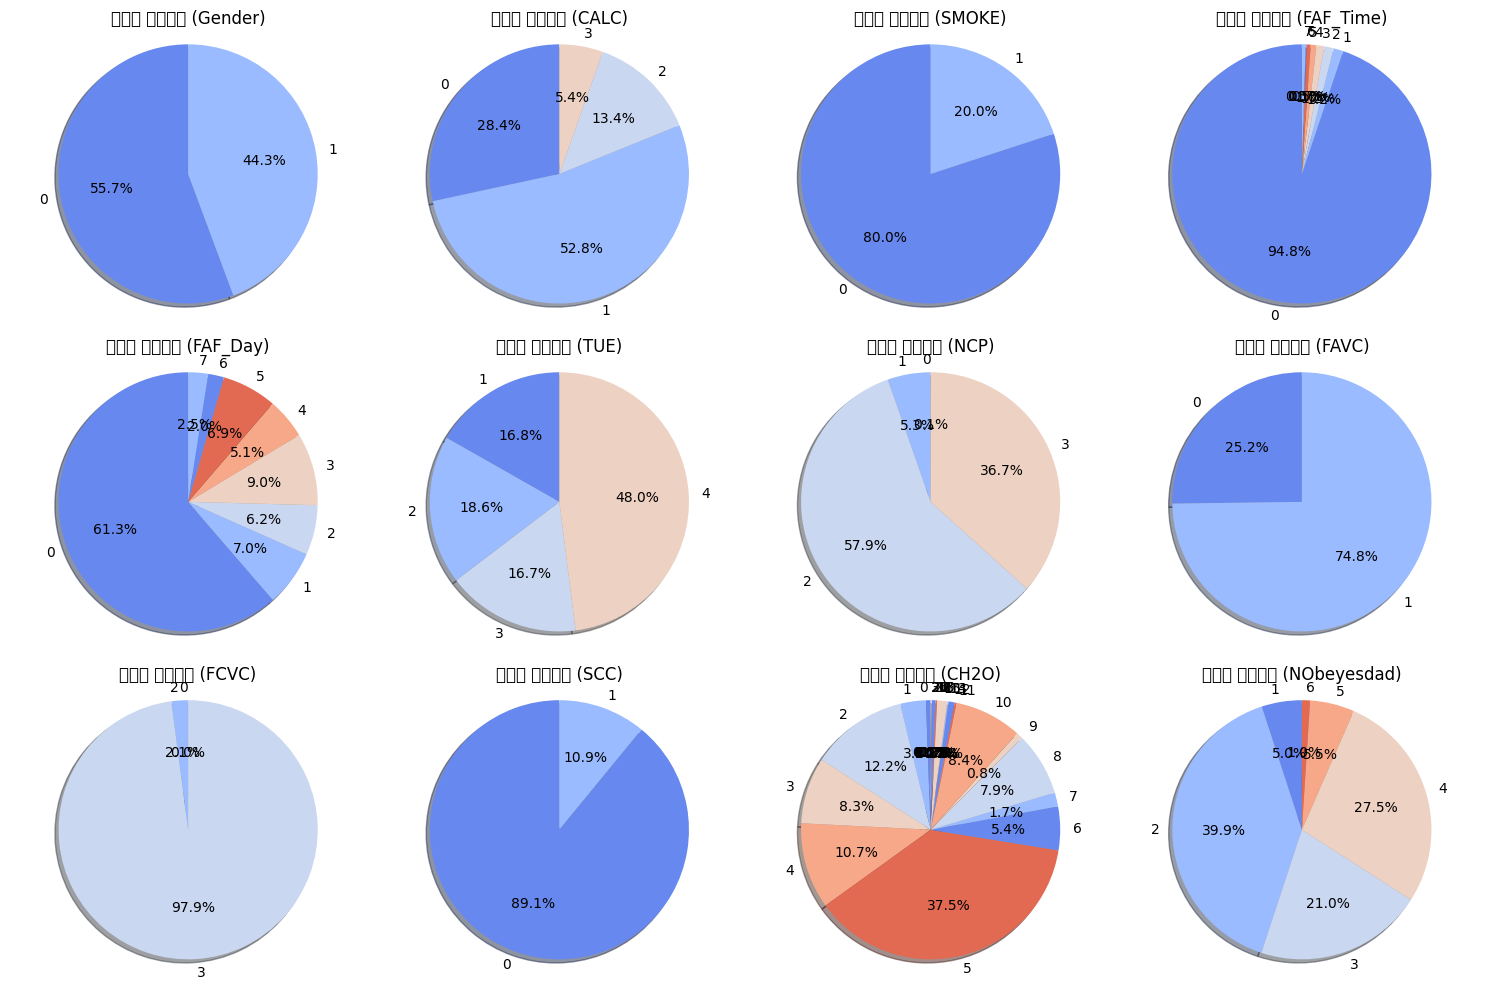

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # 3행 4열의 subplot을 생성
axs = axs.flatten()  # 2차원 배열을 1차원 배열로 변환

for i, (var, counts) in enumerate(rounded_counts.items()):
    labels = list(counts.keys())
    sizes = list(counts.values())

    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=sns.color_palette('coolwarm')) #은아님 차트 색상이 이뻐서 가져옴..ㅎㅎ
    axs[i].axis('equal')  # Equal aspect ratio ensures a circular pie chart
    axs[i].set_title(f"빈도수 파이차트 ({var})")

plt.tight_layout()  # subplot 간의 간격을 조절
plt.show()

FAF_TIME, FCVC, SCC가 다른 변수들과 다르게 불균형 한것을 확인함.

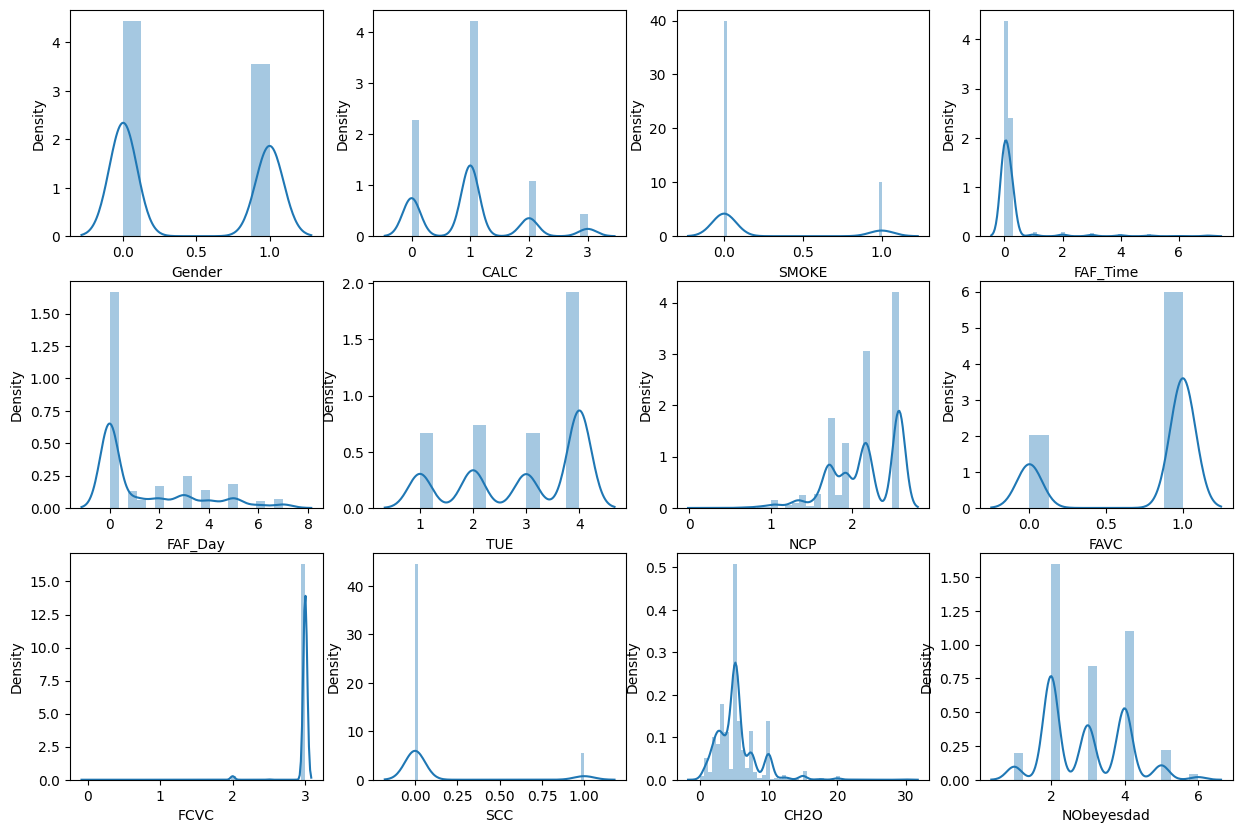

In [55]:
# 원래 데이터의 모습으로 전체 분포 막대그래프 그리기
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

sns.distplot(k_obe['Gender'], ax=axs[0,0])
sns.distplot(k_obe['CALC'], ax=axs[0,1])
sns.distplot(k_obe['SMOKE'], ax=axs[0,2])
sns.distplot(k_obe['FAF_Time'], ax=axs[0,3])

sns.distplot(k_obe['FAF_Day'], ax=axs[1,0])
sns.distplot(k_obe['TUE'], ax=axs[1,1])
sns.distplot(k_obe['NCP'], ax=axs[1,2])
sns.distplot(k_obe['FAVC'], ax=axs[1,3])

sns.distplot(k_obe['FCVC'], ax=axs[2,0])
sns.distplot(k_obe['SCC'], ax=axs[2,1])
sns.distplot(k_obe['CH2O'], ax=axs[2,2])
sns.distplot(k_obe['NObeyesdad'], ax=axs[2,3])

plt.show()

- 흡연 : 비흡연자의 비중이 큼
- FAF  : Time보다는 Day에서 골고루 응답한 것으로 확인함. 이에, 분석시 Day를 먼저 돌려보는것이 맞을듯  
- TUE  : 확실히 전자기기를 사용하는 사람이 많음
- FAVC : 고칼로리를 섭취 비중이 더 큼
- FCVC : 대부분 채소를 섭취하는 것으로 보임
- SCC  : 대부분 영양표시에 관심이 없는 것을 확인

In [64]:
# 연속형 변수 최대 최소, 평균 다시보기
k_obe_3combo = k_obe[['Age', 'Weight', 'Height']]

max_3combo = np.max(k_obe_3combo)
min_3combo = np.min(k_obe_3combo)
mean_3combo = np.mean(k_obe_3combo)

print("최댓값:", max_3combo)
print("최솟값:", min_3combo)
print("평균:", mean_3combo)

최댓값: Age        64.00
Weight    138.70
Height      1.95
dtype: float64
최솟값: Age       12.000
Weight    31.100
Height     1.372
dtype: float64
평균: Age       41.683038
Weight    65.541772
Height     1.653096
dtype: float64


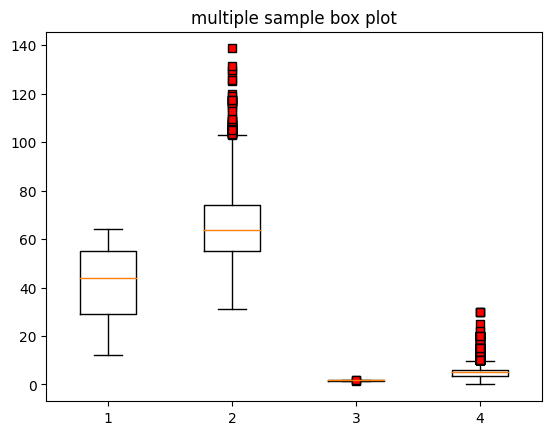

In [71]:
# 연속변수 이상치 확인
data =  k_obe[['Age', 'Weight', 'Height', 'CH2O']]
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)
plt.title("multiple sample box plot")
plt.show()

age는 이상치가 없으나체중과 신장에서 이상치를 확인
- Weight : 대략 100이상은 이상치로 확인할 수 있으면 그 중 최대값인 138.70kg은 이상치중 특이점으로 확인됨
- Height, CH2O : 잘 보이지 않아서 따로 다시보기

10대 표본 수 : 416
20대 표본 수 : 595
30대 표본 수 : 596
40대 표본 수 : 888
50대 표본 수 : 952
60대 표본 수 : 503


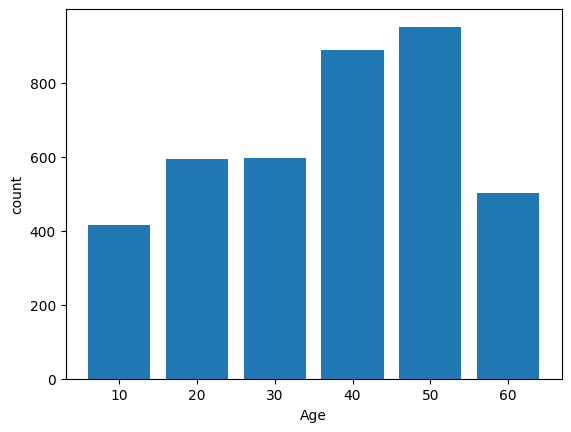

In [69]:
# AGE는 이상치가 없으므로 범위로 지정해 다시 보기

teen_cnt = k_obe[k_obe['Age'] < 20 ]['Age'].count()
twenty_cnt = k_obe[k_obe['Age'] < 30]['Age'].count() - teen_cnt
thirty_cnt = k_obe[k_obe['Age'] < 40]['Age'].count() - teen_cnt - twenty_cnt
fourty_cnt = k_obe[k_obe['Age'] < 50]['Age'].count() - teen_cnt - twenty_cnt - thirty_cnt
fifty_cnt = k_obe[k_obe['Age'] < 60]['Age'].count() - teen_cnt - twenty_cnt - thirty_cnt - fourty_cnt
sixty_cnt = k_obe[k_obe['Age'] < 70]['Age'].count() - teen_cnt - twenty_cnt - thirty_cnt - fourty_cnt - fifty_cnt

print(f'10대 표본 수 : {teen_cnt}')
print(f'20대 표본 수 : {twenty_cnt}')
print(f'30대 표본 수 : {thirty_cnt}')
print(f'40대 표본 수 : {fourty_cnt}')
print(f'50대 표본 수 : {fifty_cnt}')
print(f'60대 표본 수 : {sixty_cnt}')

plt.bar(['10', '20', '30', '40', '50', '60'], [teen_cnt, twenty_cnt, thirty_cnt, fourty_cnt, fifty_cnt, sixty_cnt])

plt.xlabel("Age")
plt.ylabel("count")

plt.show()

본데이터는 캐글과 달리 40, 50대의 비중이 더 큰것으로 보임. 이에, 캐글과 다르게 피처중요도가 나타날 가능성이 높음. 만약에 여기서도 높다면 그 피처는 정말 비만에 중요한 변수인 것으로 생각할 수도 있을 것 같음

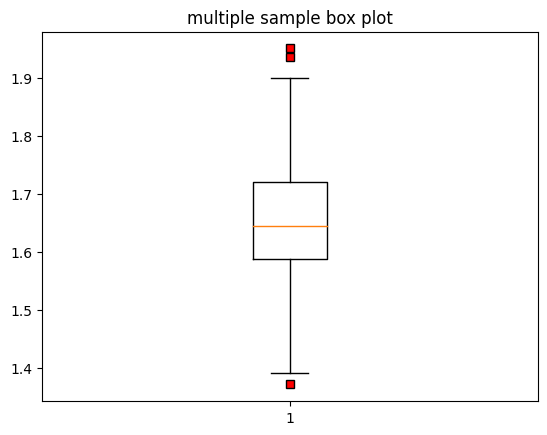

In [70]:
# 신장 이상치만 따로 보기

data =  k_obe['Height']
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)
plt.title("multiple sample box plot")
plt.show()

신장은 최저점(1.32)와 최고점(1.95)의 값들이이상치로 확인됨. 하지만 수가 적을기도 하고 딱히 제외할 필요는 없어보임

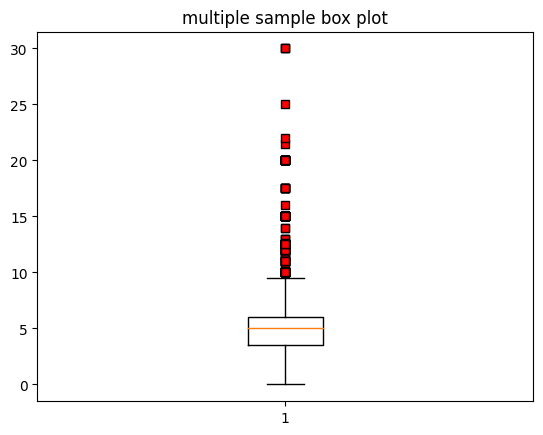

In [72]:
# 물 이상치만 따로 보기

data =  k_obe['CH2O']
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)
plt.title("multiple sample box plot")
plt.show()

10컵이상으로 이상치인것을 확인 특히 25, 30이 특이점으로 만약 데이터 삭제를 하고 싶으면 20범위인 애들부터 삭제하는 것이 좋을 듯

CH2O:    
  0: 23    
  1: 126    
  2: 480    
  3: 327    
  4: 424    
  5: 1482    
  6: 215   
  7: 68    
  8: 314     
  9: 31     
  10: 333      
  11: 10     
  12: 30     
  13: 4     
  14: 2     
  15: 49      
  16: 1      
  18: 7      
  20: 18     
  22: 2     
  25: 1     
  30: 3     

In [141]:
ch2o_counts = {
    '0-9': sum([23, 126, 480, 327, 424, 1482, 215, 68, 314, 31]),
    '10-19': sum([333, 10, 30, 4, 2, 49, 1, 7]),
    '20이상': sum([18, 2, 1, 3])
}

ch2o_counts

{'0-9': 3490, '10-19': 436, '20이상': 24}

In [173]:
def replace_with_number(value):
    if 0 <= value < 11.85:
        return 1
    elif 11.85 <= value < 20:
        return 2
    elif value >= 20:
        return 3
    else:
        return value

# 새로운 데이터프레임 생성 (샘플)
new_df = k_obe.copy()

# CH2O 범위에 해당하는 데이터를 숫자로 치환
new_df['CH2O_range'] = new_df['CH2O'].apply(replace_with_number)

new_df.head()

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,CH2O_range
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,1
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,1
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,1
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,1
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,1


In [174]:
# 각 범위별 개수 구하기
range_counts = new_df['CH2O_range'].value_counts()

# 결과 출력
print("각 범위의 개수:")
print(range_counts)

각 범위의 개수:
1    3835
2      91
3      24
Name: CH2O_range, dtype: int64


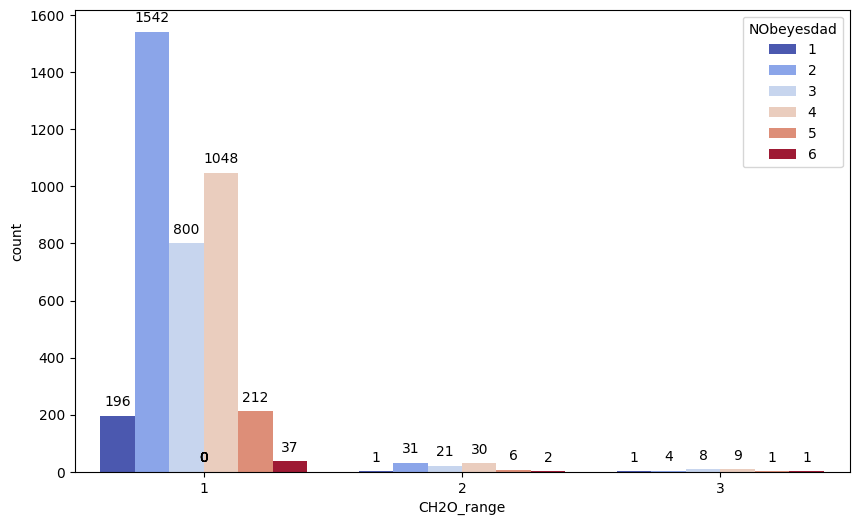

In [175]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CH2O_range', data=new_df, hue='NObeyesdad', palette='coolwarm')

# 각 막대별 빈도수 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

In [74]:
corr_df = k_obe.corr()
corr_df

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
Gender,1.000000,-0.068746,0.208880,0.355937,0.047991,0.028682,0.712403,0.534094,0.086995,0.054612,0.087452,-0.016068,-0.110222,0.128688,0.212622
Age,-0.068746,1.000000,0.137970,0.042439,-0.210721,-0.031982,-0.193087,0.003333,-0.476643,0.208544,-0.140449,0.070373,-0.051728,0.047945,0.137947
CALC,0.208880,0.137970,1.000000,0.298338,-0.092135,0.014816,0.209972,0.184475,0.024036,-0.123937,0.042761,-0.014843,-0.007530,0.082756,0.093807
SMOKE,0.355937,0.042439,0.298338,1.000000,-0.075417,-0.062314,0.284745,0.239615,0.020582,-0.130592,0.077208,-0.018778,-0.075658,0.101993,0.113925
FAF_Time,0.047991,-0.210721,-0.092135,-0.075417,1.000000,0.398795,0.038284,-0.034984,0.055207,0.015298,-0.029868,0.004509,0.029431,0.025322,-0.071084
FAF_Day,0.028682,-0.031982,0.014816,-0.062314,0.398795,1.000000,0.080332,0.031874,0.051690,0.015484,-0.143902,-0.003521,0.078555,0.115369,-0.022223
Height,0.712403,-0.193087,0.209972,0.284745,0.038284,0.080332,1.000000,0.647554,0.194741,-0.047280,0.052619,-0.023669,-0.041693,0.117780,0.157896
Weight,0.534094,0.003333,0.184475,0.239615,-0.034984,0.031874,0.647554,1.000000,0.078473,-0.059398,-0.064786,0.003628,-0.003707,0.157526,0.802405
TUE,0.086995,-0.476643,0.024036,0.020582,0.055207,0.051690,0.194741,0.078473,1.000000,-0.194006,0.047374,-0.036607,0.047613,-0.004940,-0.040429
NCP,0.054612,0.208544,-0.123937,-0.130592,0.015298,0.015484,-0.047280,-0.059398,-0.194006,1.000000,0.014476,0.135028,-0.077517,0.015328,-0.030231


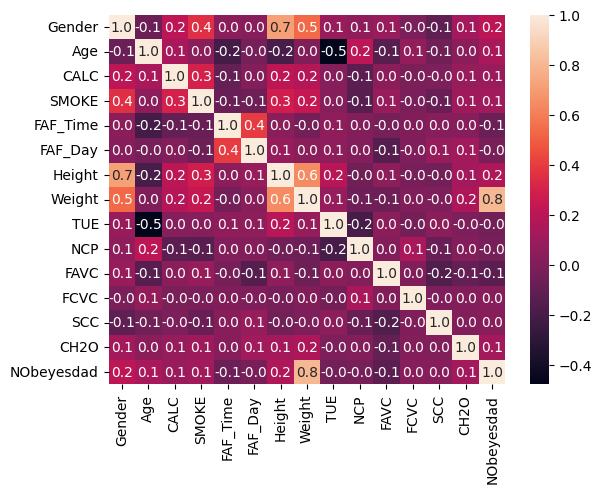

In [76]:
corr = k_obe.corr()
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()

- AGE와 TUE는 음의상관관계로 나이가 적을 수록 전자기기기 사용도가 높음을 확인함. 한국특:D
- (신장, 비만도), (체중, 비만도), (신장, 성별), (체중, 성별) : 확연하게 높은 상관관계를 가지고 있으나 맞는말,,,로 보여서 이상하게 보이지는 않음
- 다만, 흡연과 음주가 위의 변수들간의 점수보다는 낮지만, 다른 변수들보다는 높은 양의 상관관계를 보임
  - 비흡연자가 많음에도 불구하고 나름 높은 상관관계를 보여줌에 있어 둘의 관계가 좀 있다는 것을 볼수있음

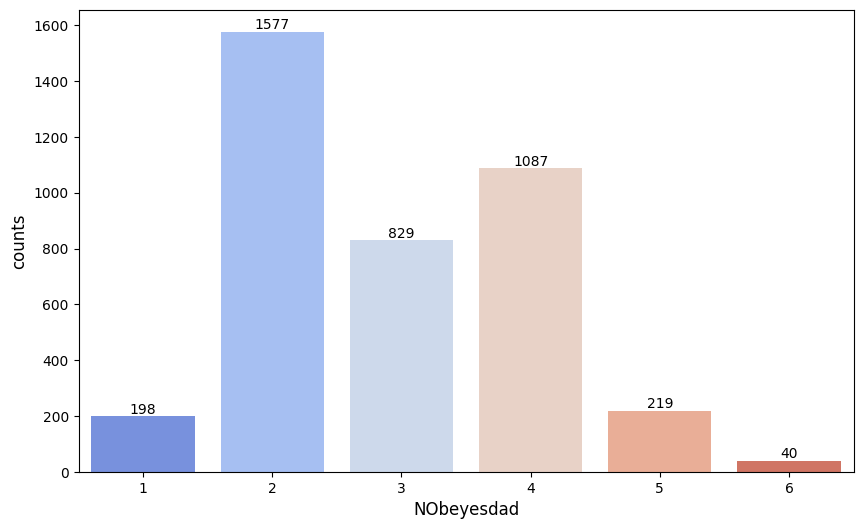

In [98]:
# 은아님 추가요청 : 비만도 레이블의 분포를 보고싶음

# 데이터 생성
NObeyesdad_counts = k_obe['NObeyesdad'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=NObeyesdad_counts.index, y=NObeyesdad_counts.values, palette='coolwarm')

# 각 막대 위에 빈도수 표시
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

plt.xlabel('NObeyesdad', fontsize=12)
plt.ylabel('counts', fontsize=12)
plt.xticks(rotation=0)
plt.show()


